# Linear regression

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables (multiple linear regression) by fitting a linear equation to the observed data. 

The goal of linear regression is to find the best-fitting straight line (or hyperplane in the case of multiple independent variables) that minimizes the sum of the squared differences between the observed and predicted values.

basic equation for linear regression is:

$$
y=mx+b
$$

where:

*y* is the dependent variable (the variable we are trying to predict)  
*x* is the independent variable  
*m* is the slope of the line, representing the change in *x*  
*b* is the y-intercept, representing the value of *y* when *x* is 0



In [1]:
import os                                                                       # operating System module for working with file paths
import pandas as pd                                                             # data manipulation and analysis
from sklearn.model_selection import train_test_split                            # for splitting datasets
from sklearn.linear_model import LinearRegression                               # for linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error   # for evaluating model performance
import matplotlib.pyplot as plt                                                 # for data visualization
import seaborn as sns                                                           # for data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # for scaling data
from sklearn.feature_selection import RFE                                       #
import numpy as np                                                              #

In [2]:
relative_file_path = "Used Car Dataset.csv"
file_path = os.path.join(os.getcwd(), relative_file_path)
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


## Data Cleaning and preprocessing

In [3]:
df = df.drop('Unnamed: 0', axis=1).copy()
df = df.drop('registration_year', axis=1).copy()

In [4]:
df.shape

(1553, 13)

In [5]:
df.dtypes

car_name               object
insurance_validity     object
fuel_type              object
seats                   int64
kms_driven              int64
ownsership             object
transmission           object
manufacturing_year     object
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object

In [6]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


We see that mean(average) is not close to median(middle value). This may indicate outliears, but we will deal with it later

In [7]:
df.duplicated().sum()
df.loc[df.duplicated()]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
40,2021 MG Gloster Savvy 6-Str,Comprehensive,Diesel,6,35000,First Owner,Automatic,2021,12.40,1996.0,1996.0,21501.0,35.00
41,2010 Maruti Swift 1.2 VXi BSII,Comprehensive,Petrol,5,100525,First Owner,Manual,2010,16.10,1197.0,1197.0,85.0,2.09
42,2015 Honda City i VTEC CVT VX,Third Party insurance,Petrol,5,83000,Second Owner,Automatic,2015,18.00,1497.0,1497.0,1173.0,6.25
43,2011 Maruti Wagon R LXI BSIII,Comprehensive,Petrol,5,40191,Second Owner,Manual,2011,998.00,671.0,671.0,90.0,2.12
44,2015 Audi A6 35 TDI,Comprehensive,Diesel,5,62152,First Owner,Automatic,2015,18.53,1968.0,1968.0,18774.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2013 Hyundai i10 Sportz,Comprehensive,Petrol,5,1800,First Owner,Manual,2013,20.36,1197.0,1197.0,789.0,3.15
1510,2019 Jeep Compass 1.4 Limited Plus BSIV,Comprehensive,Petrol,5,34000,First Owner,Automatic,2019,16.00,1368.0,1368.0,16077.0,17.50
1511,2021 Toyota Urban cruiser Premium AT,Zero Dep,Petrol,5,30000,First Owner,Automatic,2021,18.76,1462.0,1462.0,10326.0,11.40
1512,2018 Hyundai Grand i10 Sportz,Comprehensive,Petrol,5,22700,First Owner,Manual,2018,18.90,1197.0,1197.0,8186.0,5.45


In [8]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
df.shape

(1132, 13)

In [9]:
df.isna().sum()

car_name              0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         2
engine(cc)            2
max_power(bhp)        2
torque(Nm)            3
price(in lakhs)       0
dtype: int64

In [10]:
df['car_brand'] = df['car_name'].str.split().str[2:].str.join(' ')
df['main_brand'] = df['car_name'].str.split().str[1:2].str.join(' ')
df = df.drop('car_name',axis=1)

In [11]:
brand_country_map = {
    'Maruti': 'India',
    'Hyundai': 'South Korea',
    'Honda': 'Japan',
    'Mercedes-Benz': 'Germany',
    'Toyota': 'Japan',
    'BMW': 'Germany',
    'Tata': 'India',
    'Audi': 'Germany',
    'Mahindra': 'India',
    'Ford': 'United States',
    'Renault': 'France',
    'Volkswagen': 'Germany',
    'Kia': 'South Korea',
    'Nissan': 'Japan',
    'Skoda': 'Czech Republic',
    'Jeep': 'United States',
    'MG': 'United Kingdom',
    'Volvo': 'Sweden',
    'Jaguar': 'United Kingdom',
    'Land': 'United Kingdom',
    'Datsun': 'Japan',
    'Mitsubishi': 'Japan',
    'Porsche': 'Germany',
    'Mini': 'United Kingdom',
    'Isuzu': 'Japan',
    'Lexus': 'Japan',
    'Fiat': 'Italy',
    'Lamborghini': 'Italy'
}

df['origin_country'] = df['main_brand'].map(brand_country_map)

We will now fit the missing data with the mean.

In [12]:
df['mileage(kmpl)'] = df['mileage(kmpl)'].fillna(df['mileage(kmpl)'].quantile(0.5))
df['engine(cc)'] = df['engine(cc)'].fillna(df['engine(cc)'].quantile(0.5))
df['max_power(bhp)'] = df['max_power(bhp)'].fillna(df['max_power(bhp)'].quantile(0.5))
df['torque(Nm)'] = df['torque(Nm)'].fillna(df['torque(Nm)'].quantile(0.5))
df.isna().sum()

insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
car_brand             0
main_brand            0
origin_country        0
dtype: int64

Now we will check and deal with outliers

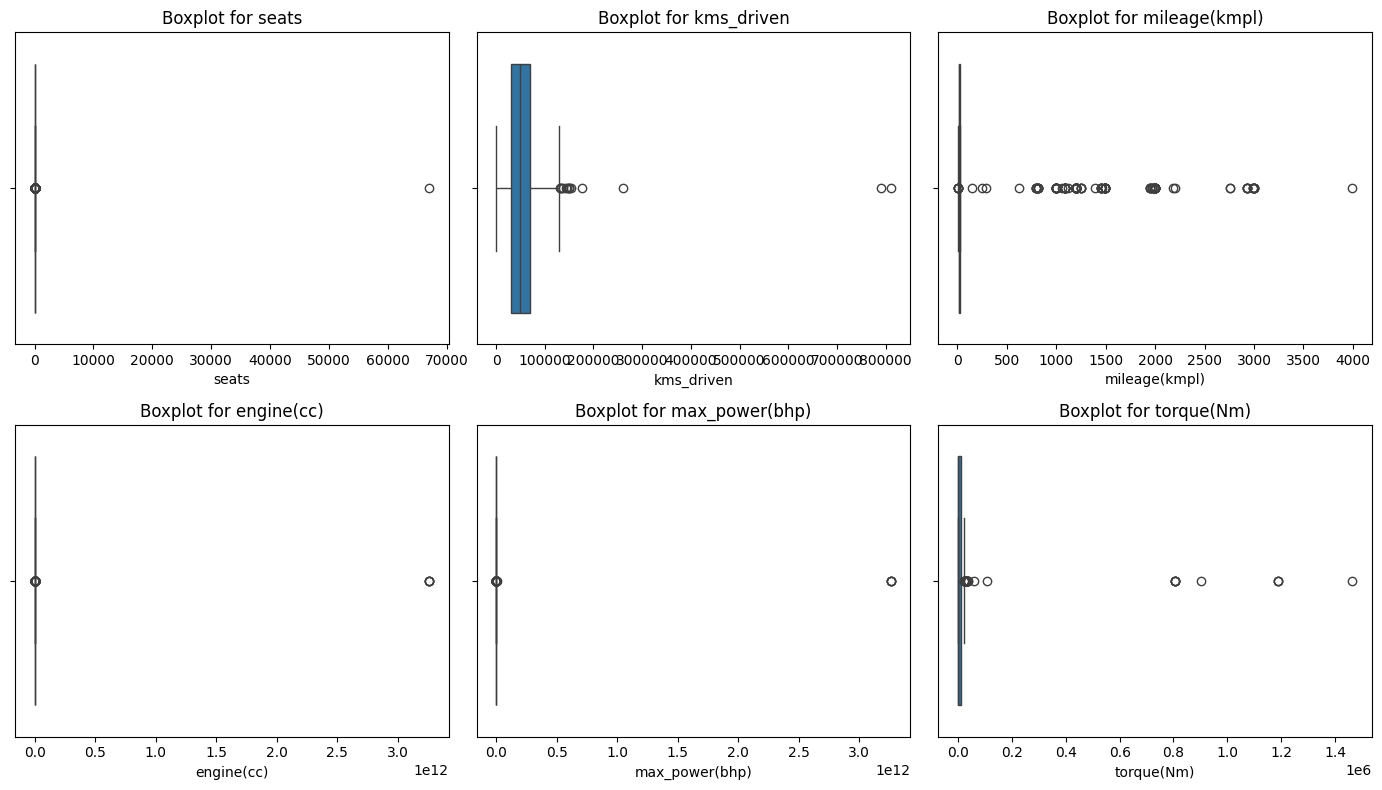

In [13]:
columns_to_plot = ['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)']
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], whis=1.5)

    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [14]:
columns_to_process = ['seats', 'mileage(kmpl)', 'kms_driven', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']

for column in columns_to_process:
    min_threshold, max_threshold = df[column].quantile([0.01, 0.97])
    df = df[(df[column] < max_threshold) & (df[column] >= min_threshold)]

df.reset_index(drop=True, inplace=True)

In [15]:
columns_to_check = ['fuel_type', 'ownsership', 'transmission', 'manufacturing_year', 'insurance_validity', 'car_brand', 'main_brand', 'origin_country']

for i in columns_to_check:
    print(f'Values for {i}:\n{df[i].value_counts()}\n')

Values for fuel_type:
fuel_type
Petrol    582
Diesel    212
CNG         5
Name: count, dtype: int64

Values for ownsership:
ownsership
First Owner     674
Second Owner    113
Third Owner       8
1461 cc           1
1451 cc           1
1199 cc           1
1248 cc           1
Name: count, dtype: int64

Values for transmission:
transmission
Manual       511
Automatic    284
2014           1
2020           1
2018           1
2017           1
Name: count, dtype: int64

Values for manufacturing_year:
manufacturing_year
2018                   138
2017                   102
2019                    97
2015                    84
2016                    80
2021                    62
2014                    61
2020                    59
2022                    33
2013                    30
2012                    21
2011                    12
2023                     9
2010                     5
Power Steering           3
2009                     2
Power Windows Front      1
Name: count, dtype: in

In [16]:
filter_values = ['Power Steering', 'Power Windows Front']
filtered_df = df.query("`manufacturing_year` in @filter_values")
print(filtered_df)


        insurance_validity fuel_type  seats  kms_driven ownsership  \
82   Third Party insurance    Diesel      5      100000    1461 cc   
106  Third Party insurance    Petrol      6       20000    1451 cc   
414  Third Party insurance    Petrol      5       60000    1199 cc   
570  Third Party insurance    Diesel      5       32141    1248 cc   

    transmission   manufacturing_year  mileage(kmpl)  engine(cc)  \
82          2014       Power Steering         1461.0      1085.0   
106         2020  Power Windows Front         1451.0       141.0   
414         2018       Power Steering         1199.0        84.0   
570         2017       Power Steering         1248.0       885.0   

     max_power(bhp)  torque(Nm)  price(in lakhs)  \
82           1085.0       248.0             6.00   
106           141.0       250.0            17.50   
414            84.0       114.0             4.75   
570           885.0       200.0             6.00   

                             car_brand main_bra

We can see that data in those rows are broken in many columns. Therfore we decide to drop these rows all together. WE will use broken values in the manufacturin_year column because relativly many broken values are here under only 2 unique values.

In [17]:
mask = df['manufacturing_year'].str.contains('Power Steering|Power Windows Front')
df = df[~mask] # Invert the mask to keep rows that do not contain the specified values

df.reset_index(drop=True, inplace=True)

In [18]:
columns_to_check = ['fuel_type', 'ownsership', 'transmission', 'manufacturing_year', 'insurance_validity', 'car_brand', 'main_brand',  'origin_country']

for i in columns_to_check:
    print(f'Values for {i}:\n{df[i].value_counts()}\n')

Values for fuel_type:
fuel_type
Petrol    580
Diesel    210
CNG         5
Name: count, dtype: int64

Values for ownsership:
ownsership
First Owner     674
Second Owner    113
Third Owner       8
Name: count, dtype: int64

Values for transmission:
transmission
Manual       511
Automatic    284
Name: count, dtype: int64

Values for manufacturing_year:
manufacturing_year
2018    138
2017    102
2019     97
2015     84
2016     80
2021     62
2014     61
2020     59
2022     33
2013     30
2012     21
2011     12
2023      9
2010      5
2009      2
Name: count, dtype: int64

Values for insurance_validity:
insurance_validity
Comprehensive            588
Third Party insurance    133
Third Party               42
Zero Dep                  32
Name: count, dtype: int64

Values for car_brand:
car_brand
Grand i10 Magna              15
Grand i10 Sportz             13
Swift Dzire VXI              11
WR-V i-VTEC VX               10
Baleno Zeta                   9
                             ..
3 Ser

We see that dropping those rows removed issues from other columns

## EDA (Exploratory Data Analysis) and cleaning
The purpose of EDA is to summarize the main characteristics of a dataset. The goal of EDA is to gain insights into the underlying patterns, relationships, and distributions within the data before applying more advanced statistical or machine learning techniques.

In [19]:
cat_columns = df.select_dtypes(exclude=['number']).columns.tolist()
numerical_col =  df.select_dtypes(include=['number']).columns.tolist()

df_corr = df[numerical_col].dropna().corr()

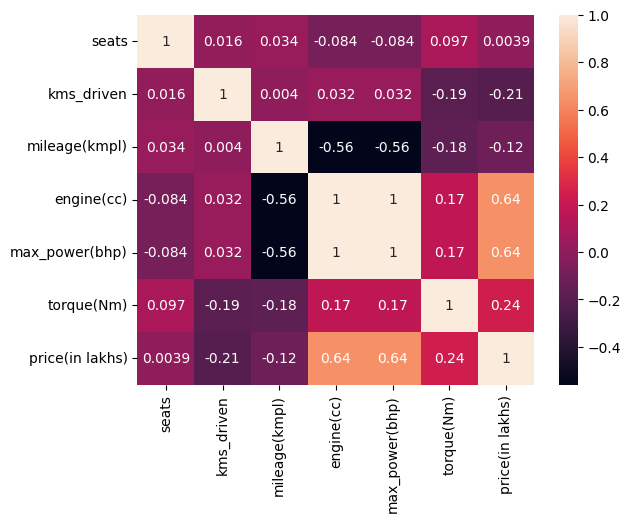

In [20]:
sns.heatmap(df_corr, annot=True)
plt.show()

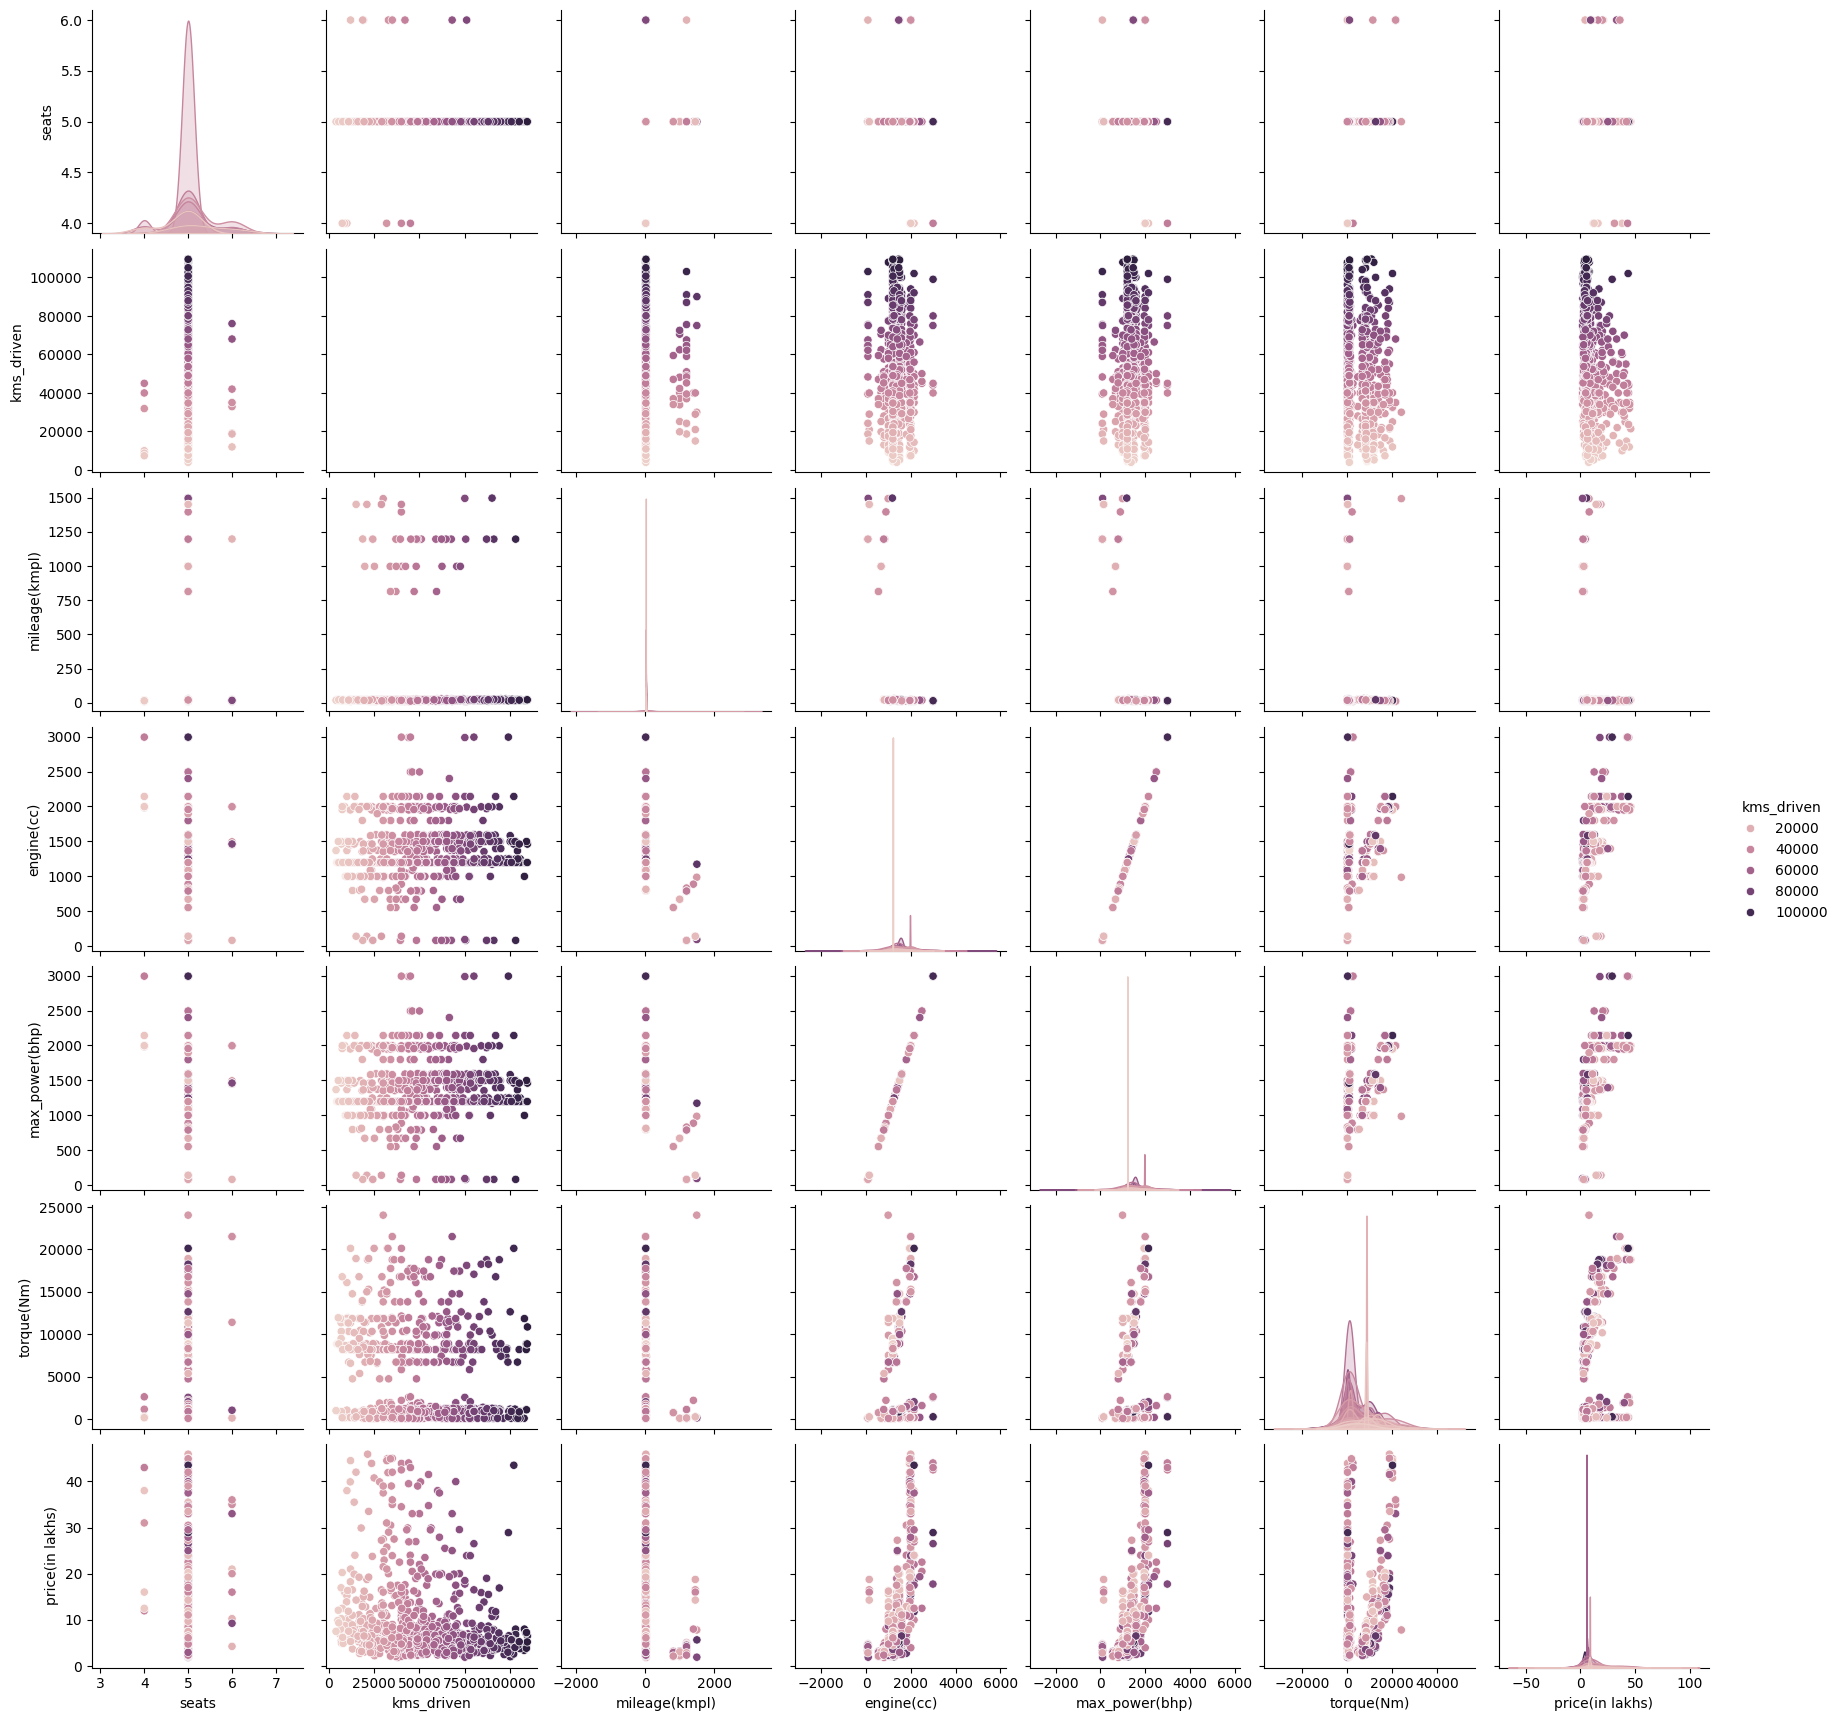

In [21]:
sns.pairplot(df, vars=numerical_col, hue='kms_driven')
plt.show()

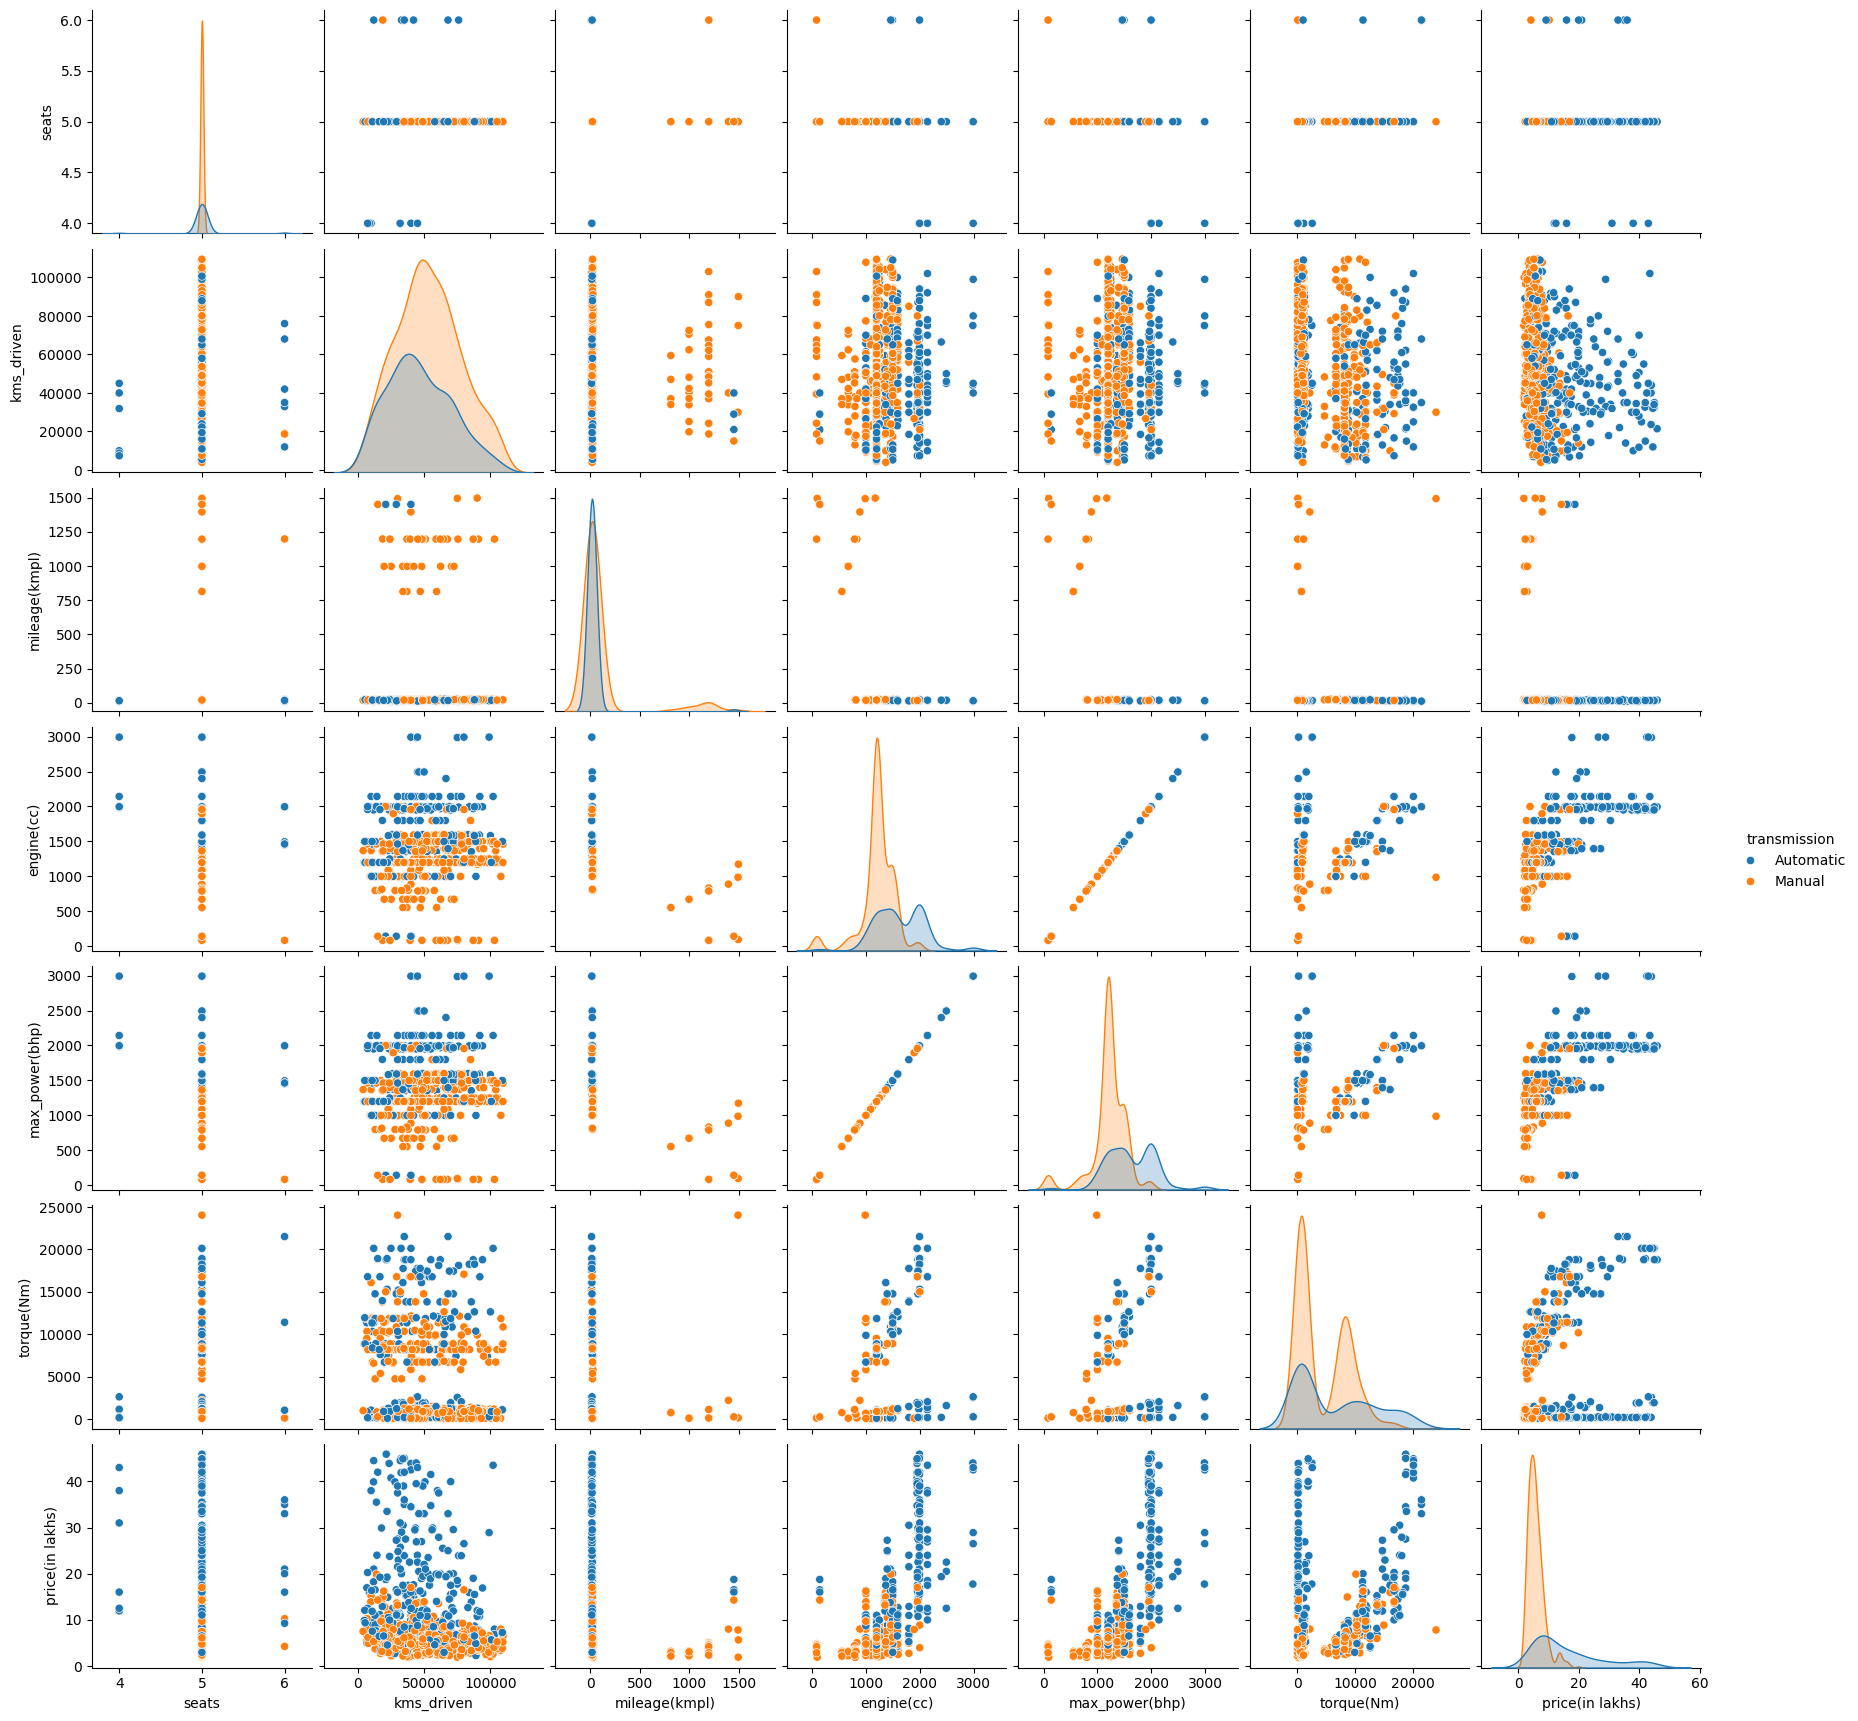

In [22]:
sns.pairplot(df,vars=numerical_col,hue='transmission')
plt.show()

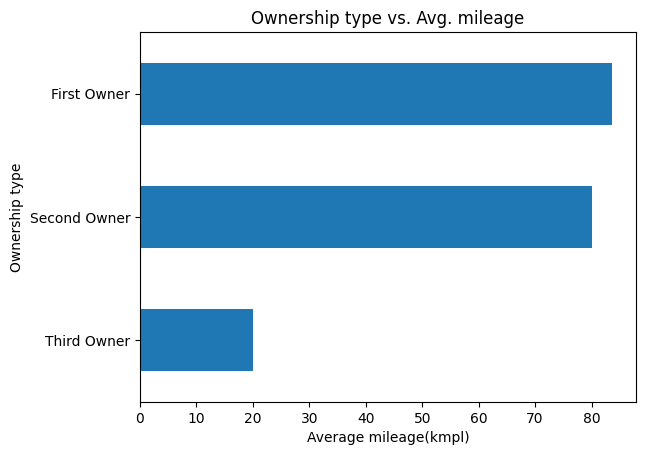

In [23]:
df.groupby(['ownsership'])['mileage(kmpl)']\
  .agg(['mean'])\
  .sort_values('mean')['mean']\
  .plot(kind='barh',title='Ownership type vs. Avg. mileage')
plt.xlabel('Average mileage(kmpl)')
plt.ylabel('Ownership type')
plt.show()

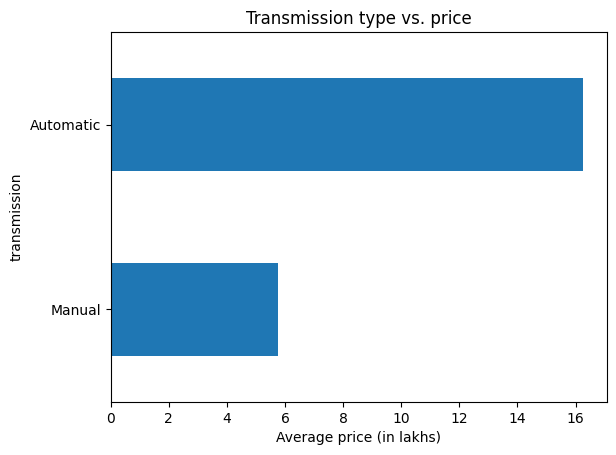

In [24]:
df.groupby(['transmission'])['price(in lakhs)']\
  .agg(['mean'])\
  .sort_values('mean')['mean']\
  .plot(kind='barh',title='Transmission type vs. price')
plt.xlabel('Average price (in lakhs)')
plt.show()

In [25]:

df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_brand,main_brand,origin_country
0,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Magnite Turbo CVT XV Premium Opt BSVI,Nissan,Japan
1,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,X1 sDrive 20d xLine,BMW,Germany
2,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Seltos GTX Plus,Kia,South Korea
3,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Superb LK 1.8 TSI AT,Skoda,Czech Republic
4,Third Party insurance,Petrol,5,42000,First Owner,Manual,2017,18.70,1199.0,1199.0,887.0,5.45,Jazz 1.2 S i VTEC,Honda,Japan


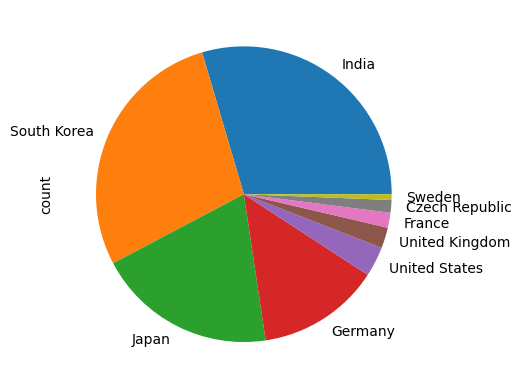

<Figure size 1500x500 with 0 Axes>

In [26]:
df['origin_country'].value_counts().plot(kind='pie')
plt.figure(figsize=(15,5))
plt.show()

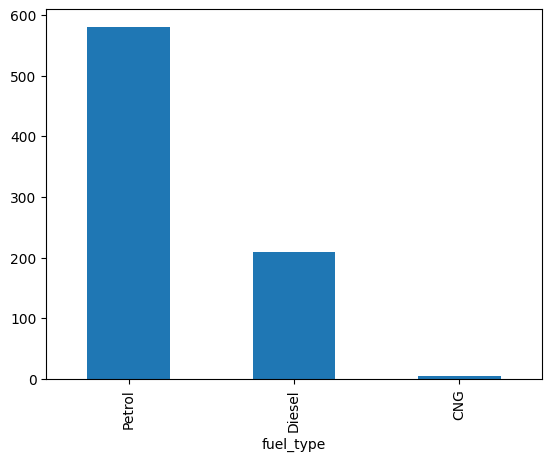

In [27]:
df['fuel_type'].value_counts().plot(kind='bar')
plt.show()

## Encoding and scaling
Now that we have cleaned and prepered numeric data we should scale it so that different measurment do not influance our model. If we don't do it for example number of doors 3 would be inconsequential to the number of km driven in the car 50,000. 

After that we will encode strings - we will change them into numbers so they can be operational data for our model.

In [28]:
df['ownsership'] = df['ownsership'].replace({'First Owner' : 4, 
                                                'Second Owner': 3, 
                                                'Third Owner' : 2,
                                                'Fifth Owner' : 1
                                               })

df['transmission'] = df['transmission'].replace({'Manual' : 1,
                                                   'Automatic' : 2
                                                    })

df['fuel_type'] = df['fuel_type'].replace({'Petrol' : 3,
                                                'Diesel' : 2,
                                                'CNG' : 1
                                               })

df = pd.get_dummies(df,columns=['insurance_validity','origin_country'])

#df.info()

In [29]:
change_types = ['ownsership', 'seats', 'kms_driven', 'manufacturing_year']

for i in change_types:
    df[i] = df[i].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   fuel_type                                 795 non-null    int64  
 1   seats                                     795 non-null    float64
 2   kms_driven                                795 non-null    float64
 3   ownsership                                795 non-null    float64
 4   transmission                              795 non-null    int64  
 5   manufacturing_year                        795 non-null    float64
 6   mileage(kmpl)                             795 non-null    float64
 7   engine(cc)                                795 non-null    float64
 8   max_power(bhp)                            795 non-null    float64
 9   torque(Nm)                                795 non-null    float64
 10  price(in lakhs)                       

In [30]:
scalable_feat = ['kms_driven', 'manufacturing_year', 'mileage(kmpl)', 'max_power(bhp)', 'engine(cc)', 'torque(Nm)']

scaler = StandardScaler()
df[scalable_feat] = scaler.fit_transform(df[scalable_feat])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   fuel_type                                 795 non-null    int64  
 1   seats                                     795 non-null    float64
 2   kms_driven                                795 non-null    float64
 3   ownsership                                795 non-null    float64
 4   transmission                              795 non-null    int64  
 5   manufacturing_year                        795 non-null    float64
 6   mileage(kmpl)                             795 non-null    float64
 7   engine(cc)                                795 non-null    float64
 8   max_power(bhp)                            795 non-null    float64
 9   torque(Nm)                                795 non-null    float64
 10  price(in lakhs)                       

In [31]:
df = df.drop(['main_brand','car_brand'],axis=1)
df.shape

(795, 24)

In [32]:
df.to_csv('Used Cars Dataset(output).csv', index=False)

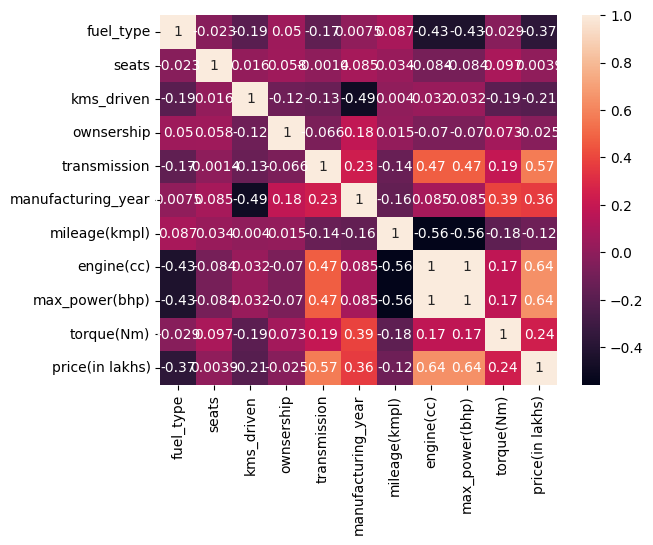

In [33]:
cat_columns = df.select_dtypes(exclude=['number']).columns.tolist()
numerical_col =  df.select_dtypes(include=['number']).columns.tolist()

df_corr = df[numerical_col].dropna().corr()

sns.heatmap(df_corr, annot=True)
plt.show()

## Building a model
We need:  
1) Select features  
2) Split the data into training and test population
3) Construct the model  
4) Fit the data to the model
5) Evaluate model performence

Because we are not sure which features are best for selection and Linear models are not costly to run we can iterate over each model win n features and see which number gives the best prediction.

We will use technique which is called RFE (Recursive Feature Elimination) 
It is a feature selection technique commonly used in machine learning to select a subset of features by recursively removing the least important features based on a specified model. The goal of RFE is to improve model performance, reduce overfitting, and enhance interpretability by focusing on the most relevant features.

In [34]:
X = df.drop('price(in lakhs)',axis=1)
y = df['price(in lakhs)']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
estimator = LinearRegression()
selected_features_list = []
r2_scores_list = []

for n in range(1, len(df.columns)):
    RFE_selector = RFE(estimator=estimator, n_features_to_select=n, step=1)
    RFE_selector.fit(X_train, y_train)

    selected_features = X_train.columns[RFE_selector.support_].tolist()
    selected_features_list.append(selected_features)

    select_x_train = RFE_selector.transform(X_train)
    select_x_test = RFE_selector.transform(X_test)
    
    estimator.fit(select_x_train, y_train)
    predict = estimator.predict(select_x_test)
    
    r2score = r2_score(y_test, predict)
    r2_scores_list.append(r2score)

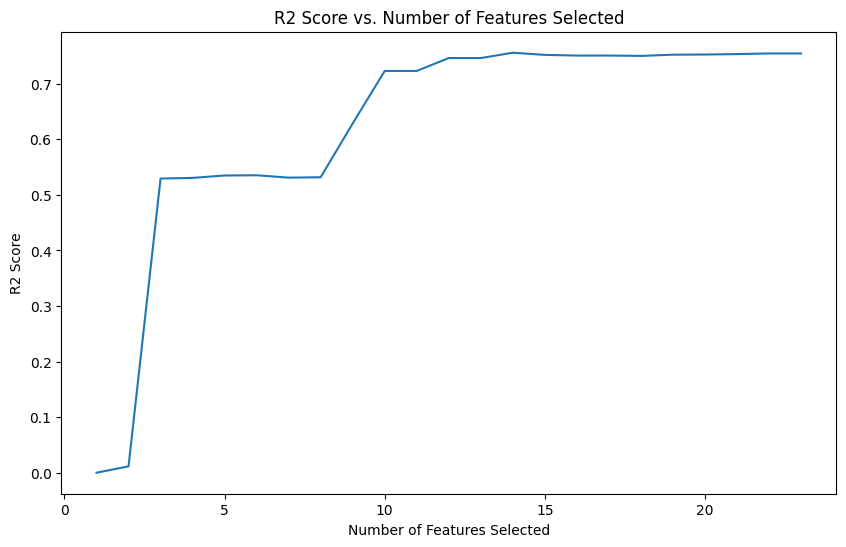

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df.columns)), r2_scores_list)
plt.title('R2 Score vs. Number of Features Selected')
plt.xlabel('Number of Features Selected')
plt.ylabel('R2 Score')
plt.show()

In [38]:
RFE_selector = RFE(estimator=estimator, n_features_to_select=len(df.columns), step=1)
RFE_selector.fit(X_train, y_train)

selected_features = RFE_selector.get_support()
selected_feature_names = X_train.columns[selected_features]

selected_feature_names

Index(['fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'insurance_validity_Comprehensive',
       'insurance_validity_Third Party',
       'insurance_validity_Third Party insurance',
       'insurance_validity_Zero Dep', 'origin_country_Czech Republic',
       'origin_country_France', 'origin_country_Germany',
       'origin_country_India', 'origin_country_Japan',
       'origin_country_South Korea', 'origin_country_Sweden',
       'origin_country_United Kingdom', 'origin_country_United States'],
      dtype='object')

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'rmse is {rmse} \n mse is {mse} \n r2 is {r2}')

rmse is 4.409099166386885 
 mse is 19.440155459033527 
 r2 is 0.7543304983949983


**In the end we achived score of 75%.**

If we would want to tune the model further we could look for example at the outliers and specify further for each individual feature the values we want to drop.